In [11]:
import csv

with open('roundness.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    d = list(reader)

crown_roundness, fruit_roundness = zip(*d)
print len(crown_roundness)
print len(fruit_roundness)

91
91


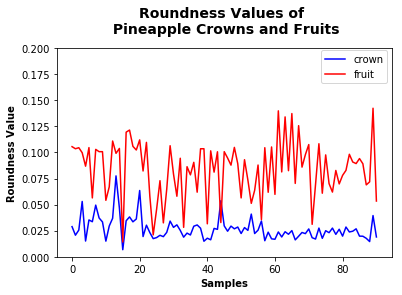

In [114]:
from matplotlib.pyplot import *

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Roundness Values of \n Pineapple Crowns and Fruits', y=1.04, fontsize=14, fontweight='bold')

ax.plot(crown_roundness, label="crown", color='b')
ax.plot(fruit_roundness, label="fruit", color='r')
ax.set_xlabel('Samples', fontweight='bold')
ax.set_ylabel("Roundness Value", fontweight='bold')
ax.set_ylim([0,0.2])
legend(bbox_to_anchor=(0.79, 0.99), loc=2, borderaxespad=0.)

plt.show()

In [115]:
import copy

classes = ['crown', 'fruit']
kelas_test = []
for i in range (182):
    if i < 91:
        kelas_test.append(0)
    else:
        kelas_test.append(1)

prediction_test = copy.copy(kelas_test)
prediction_test[30]=1
prediction_test[122]=0

In [126]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, y=1.04, fontsize=12, fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[90  1]
 [ 1 90]]


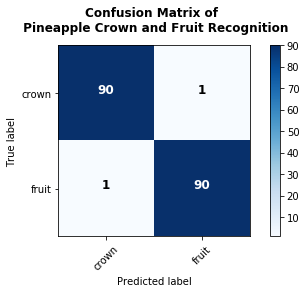

In [127]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(kelas_test, prediction_test)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion Matrix of \n Pineapple Crown and Fruit Recognition')
plt.show()